In [6]:
import numpy as np
from numpy.random import rand
np.random.seed(0)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams['text.usetex'] = True

from IPython.display import clear_output

from tqdm.auto import tqdm, trange

from Ising import IsingLattice

In [7]:
Tc = 2 / np.log(1 + np.sqrt(2)) # Critical temperature for the inifinite system
                                # Onsager's solution

In [8]:
Ts = np.linspace(1.5, 3.5, 32)  # Temperature grid
N = 8                           # Grid size
Lattices = []

# Generate samples
for T in tqdm(Ts, desc='Temperature sweep around Tc', leave=True):
    Lattices.append(IsingLattice(T=T, N=N))

Temperature sweep around Tc:   0%|          | 0/32 [00:00<?, ?it/s]

0it [00:00, ?it/s]

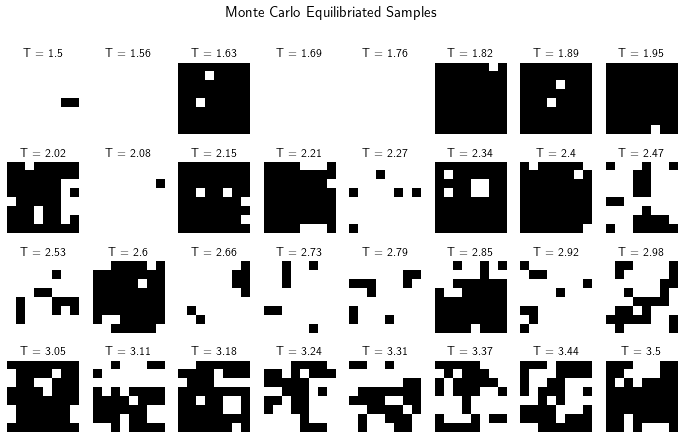

In [11]:
f = plt.figure(figsize=(12, 7)); # To visulaize equilibriated lattices
plt.suptitle('Monte Carlo Equilibriated Samples' , fontsize=15)

for i,L in tqdm(enumerate(Lattices)):
    f.add_subplot(4,8,i+1);
    plt.imshow(L.state0, cmap='binary')
    plt.axis('off')
    plt.title('T = %s'%(np.round(L.T,2)))
    
plt.savefig('Monte_Carlo_Equilibriated_Lattices.jpg', dpi =120, bbox_inches='tight')

In [12]:
# Final results

Es_mean = np.array([np.mean(L.samples['Es']) for L in Lattices])/N**2
Es_std = np.array([np.std(L.samples['Es']) for L in Lattices])/N**2

Ms_mean = np.array([np.mean(L.samples['Ms']) for L in Lattices])/N**2
Ms_std = np.array([np.std(L.samples['Ms']) for L in Lattices])/N**2

Cs = [L.samples['Es'].var()/(T1**2 * N**2) for L, T1 in zip(Lattices, Ts)]

Xs = [L.samples['Ms'].var()/(T1 * N**2) for L, T1 in zip(Lattices, Ts)]

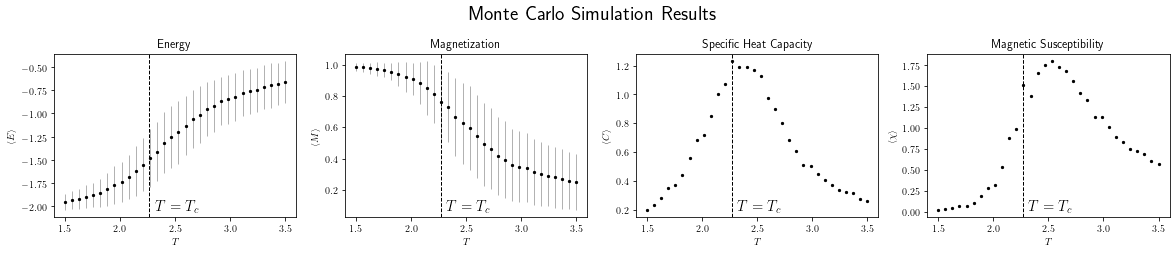

In [15]:
f = plt.figure(figsize=(20, 3)); #  
plt.suptitle(' Monte Carlo Simulation Results ', fontsize=20,
            y=1.1)

f.add_subplot(1,4,1);

plt.errorbar(Ts, Es_mean, yerr=Es_std, c='k', elinewidth=1, alpha=0.3, ls='none')
plt.axvline(x=Tc, c='k', linewidth=1, linestyle='--')
plt.annotate(r'$T = T_c$', xy=(Tc+0.05,np.min(Es_mean-Es_std)), fontsize=15);

plt.scatter(Ts, Es_mean, s=5, c='k')
plt.xlabel(r'$T$')
plt.ylabel(r'$\langle E \rangle$')

plt.title('Energy');

f.add_subplot(1,4,2);

plt.errorbar(Ts, Ms_mean, yerr=Ms_std, c='k', elinewidth=1, alpha=0.3, ls='none')
plt.axvline(x=Tc, c='k', linewidth=1, linestyle='--')
plt.annotate(r'$T = T_c$', xy=(Tc+0.05,np.min(Ms_mean-Ms_std)), fontsize=15);

plt.scatter(Ts, Ms_mean, s=5, c='k')
plt.xlabel(r'$T$')
plt.ylabel(r'$\langle M \rangle$')

plt.title('Magnetization');

f.add_subplot(1,4,3);

plt.scatter(Ts, Cs, s=5, c='k')
plt.xlabel(r'$T$')
plt.ylabel(r'$\langle C \rangle$')

plt.axvline(x=Tc, c='k', linewidth=1, linestyle='--')
plt.annotate(r'$T = T_c$', xy=(Tc+0.05,np.min(Cs)), fontsize=15);

plt.title('Specific Heat Capacity');

f.add_subplot(1,4,4);

plt.scatter(Ts, Xs, s=5, c='k')
plt.xlabel(r'$T$')
plt.ylabel(r'$\langle \chi \rangle$')

plt.axvline(x=Tc, c='k', linewidth=1, linestyle='--')
plt.annotate(r'$T = T_c$', xy=(Tc+0.05,np.min(Xs)), fontsize=15);

plt.title('Magnetic Susceptibility');

plt.savefig('Monte_Carlo_Results.jpg', dpi=120,
            bbox_inches='tight')